# 2.1 - Testeo de hipótesis

##### Recordatorio


+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población


**Método Científico**

![scientific_method](images/scientific_method.jpeg)

# Hipotesis

+ **H0**

Hipótesis nula. (H0). H0 es el status quo, el mainstream, la hipótesis a vencer por el investigador.


+ **H1**

Hipótesis alternativa. (H1). H1 es la nueva hipótesis, la del investigador.

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite (minimo tamaño de la muestra = 30)

**3)**

Tamaño adecuado de la muestra. 

**Tamaño de la muestra**

https://es.wikipedia.org/wiki/Tama%C3%B1o_de_la_muestra

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la t-Student para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

# Test (estadistico)

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# P-value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$
$$pvalue < umbral => H1$$

El umbral esta determinado por el intervalo de confianza.

In [1]:
import pylab as plt
from scipy.stats import norm

In [2]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

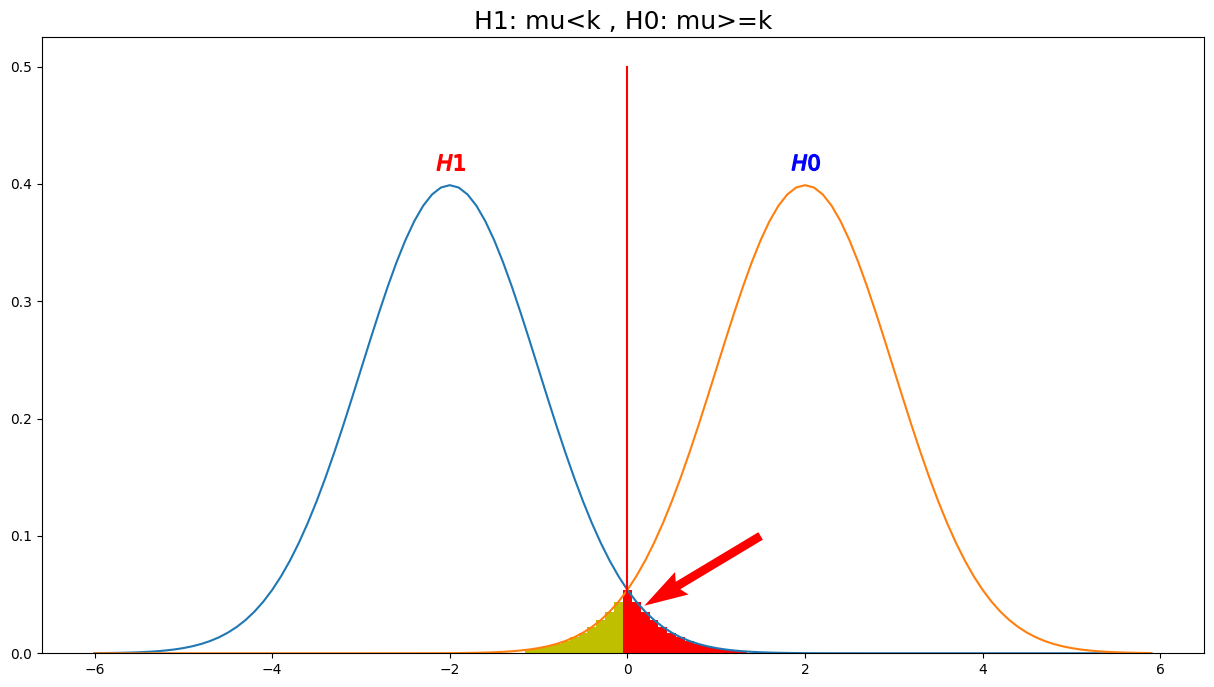

In [3]:
%matplotlib inline

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H1$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H0$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

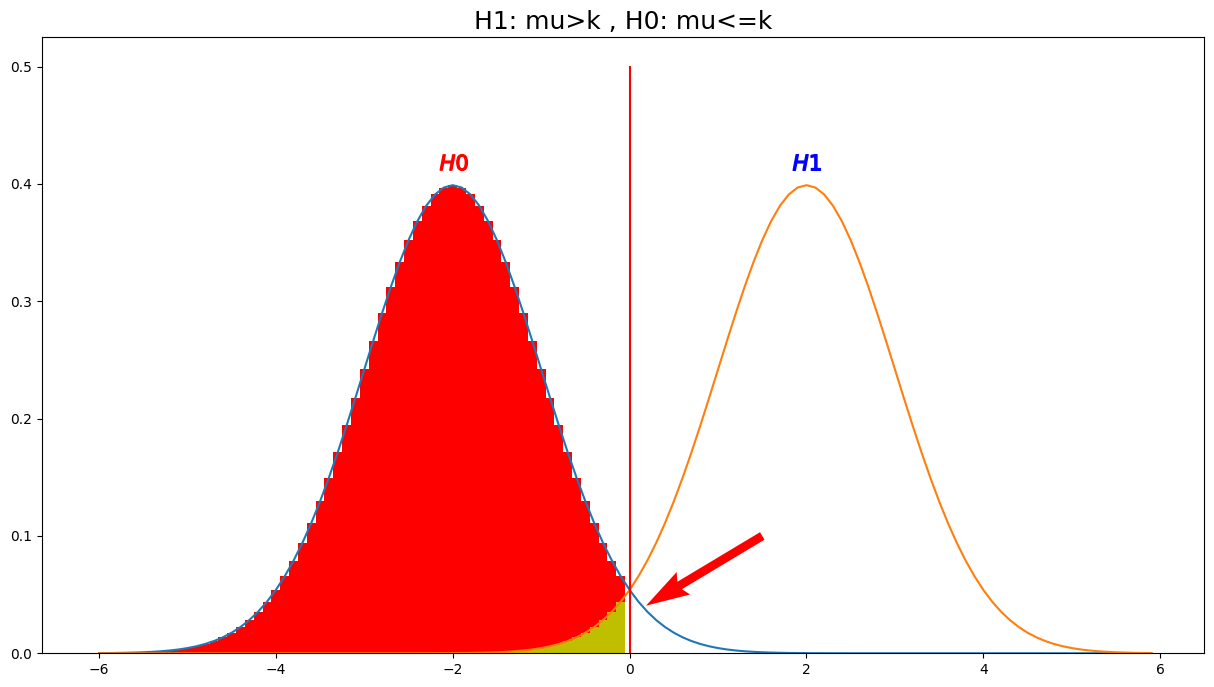

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

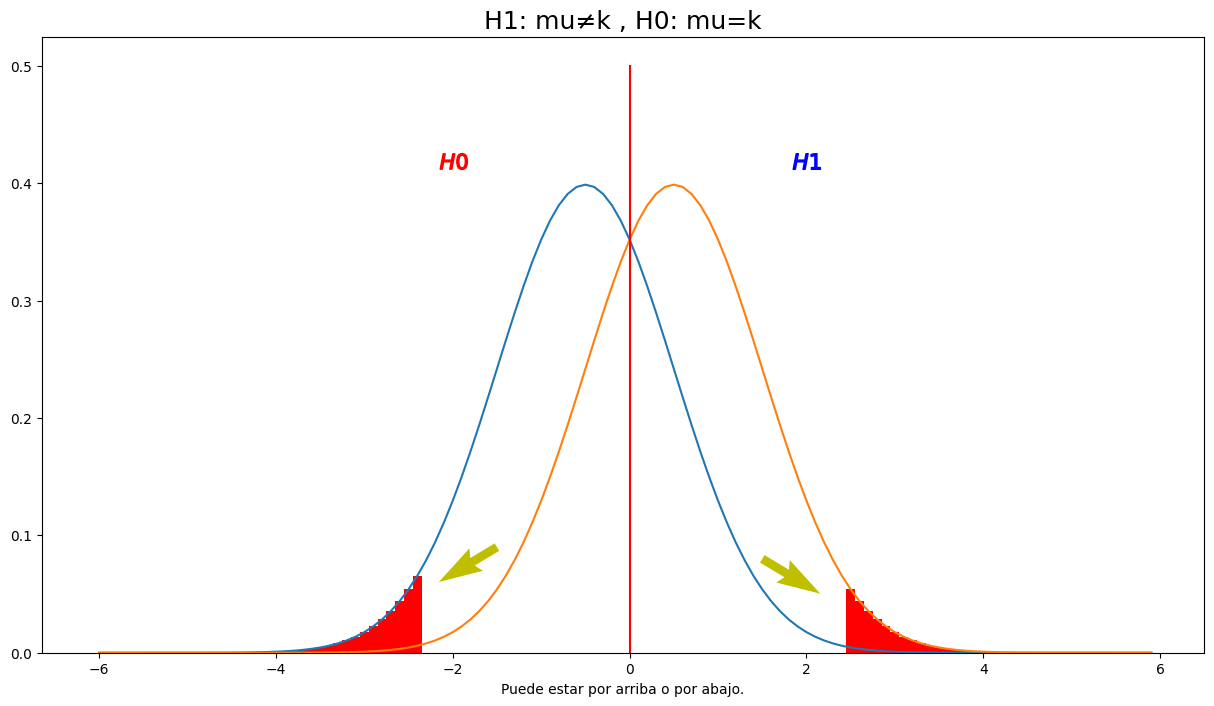

In [5]:
y1=[norm.pdf(x, -.5, 1) for x in x]
y2=[norm.pdf(x, .5, 1) for x in x]

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.08, 1, -0.6, color='y', scale=20)  # para pintar una flecha
plt.quiver(-1.5, 0.09, -1, -0.6, color='y', scale=20)

for i in range(85, 100):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y2[i], width=0.1, color='r')

for i in range(37):
    if y1[i]>=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu≠k , H0: mu=k', fontsize=18)
plt.xlabel('Puede estar por arriba o por abajo.');

# Ejemplo estudio farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [6]:
import numpy as np

from scipy.stats import t

In [7]:
# a manita

mu=5.7   # media poblacional

mu_hat=5.1   # media muestral, media del estudio

std_hat=1.6  # std muestra, std del estudio

n=100   # tamaño de la muestra

In [8]:
t_test = (mu_hat - mu)/(std_hat/np.sqrt(n))

t_test

-3.750000000000003

In [9]:
dof = n-1  # grados de libertad

dof

99

In [10]:
p_value=t(df=dof).cdf(t_test)

p_value

0.0001489332089038242

In [11]:
# lo mismo...o casi

from scipy.stats import ttest_1samp

In [17]:
# son los datos, esto sale del dataframe, creando datos fake

pacientes=np.random.normal(mu_hat, std_hat, n)

pacientes[:10]

array([6.77673631, 3.93156961, 1.93444626, 8.38660692, 6.29746762,
       4.98740429, 7.9627456 , 3.03900187, 4.40359587, 3.58248247])

In [18]:
t_test=ttest_1samp(pacientes, mu, alternative='less')

t_test

Ttest_1sampResult(statistic=-3.6950283410391296, pvalue=0.00018025333815165255)

In [15]:
t_test.statistic

-2.111898239020797

In [19]:
t_test.pvalue

0.00018025333815165255

**Conclusion:**

Si buscamos un intervalo de confianza del 99,9%, entonces $umbral=0.001$

El pvalor obtenido es mayor que el umbral, por lo tanto NO podemos rechazar H0.

# Ejemplo Altura

Estudio media altura humana, 100 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0?

In [20]:
t_test = (1.72 - 1.7) / (0.2/np.sqrt(100))

p_value= 1 - t(df=99).cdf(t_test)

p_value

0.15987423706965065

In [21]:
# con scipy

t_test=ttest_1samp(np.random.normal(1.72, 0.2, 100), 1.7, alternative='greater')

t_test

Ttest_1sampResult(statistic=1.744513920759617, pvalue=0.04208649277565089)

In [22]:
t_test.pvalue

0.04208649277565089

**Conclusion**

Si buscamos un intervalo de confianza del 95%, entonces $umbral=0.05$

El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0.

**OJO**

Si buscamos un intervalo de confianza del 80%, entonces $umbral=0.2$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Z-test  

$N(\mu, \sigma)$

supongamos $\sigma=0.25$ , std de la poblacion

In [23]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [24]:
from statsmodels.stats import weightstats as w

In [27]:
z_score, p_value = w.ztest(np.random.normal(1.72, 0.25, 100), value=1.7, alternative='larger')

z_score, p_value

(1.4396901455563387, 0.0749775413126136)

In [28]:
help(w.ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

In [29]:
z_score=(1.72 - 1.7) / (0.25/np.sqrt(100))

z_score

0.8000000000000007

# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Por otro lado hay que considerar la independencia de las muestras.

Si son dependientes (matched pairs), entonces se usa el t-test:

+ Welch's t-test


$$t=\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1^2}+\frac{s_2^2}{n_2^2}}}$$

In [30]:
import pandas as pd

from scipy.stats import ttest_rel  # testeo con dos muestras dependientes

from scipy.stats import ttest_ind  # testeo con dos muestras independientes

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

In [31]:
b_pres=pd.read_csv('../data/blood_pressure 2.csv')

b_pres.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [32]:
ttest_rel(b_pres['before'], b_pres['after'])

Ttest_relResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [33]:
ttest_1samp(b_pres['before'] - b_pres['after'], 0)

Ttest_1sampResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [34]:
b_pres.before.mean(), b_pres.after.mean()

(136.53695250569925, 99.23670008065471)

In [35]:
b_pres.before.std(), b_pres.after.std()

(10.189313601006058, 9.06019990806161)

In [36]:
b_pres.before.mean() - b_pres.after.mean()

37.30025242504453

**Conclusion**

El p_Value tiende a cero. Podemos rechazar H0.

### muestras independientes


In [37]:
ab_test=pd.read_csv('../data/ab_test.csv')

ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [39]:
ttest_ind(ab_test['a'], ab_test['b'], alternative='two-sided')

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447344)

In [40]:
ab_test.a.mean(), ab_test.b.mean()

(9.3554, 12.466000000000001)

In [41]:
ab_test.a.std(), ab_test.b.std()

(5.235270185803914, 6.4912553422560215)

In [42]:
ttest_ind(ab_test.a, ab_test.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828827)

**Conclusion**

El p_value es menor que el umbral, dependiendo del intervalo de confianza, pero siendo asi podemos rechazar H0, y decir que existe una diferencia significativa entre ambas muestras, una pagina web funciona mejor que otra.

## Normalidad - Test de Shapiro

**H0: es Normal**


**H1 : NO es Normal**

In [43]:
from scipy.stats import shapiro

In [44]:
shapiro(ab_test.a)

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [45]:
shapiro(ab_test.b)

ShapiroResult(statistic=0.965631365776062, pvalue=0.1529160439968109)

**normalizando**

In [46]:
# a mano

a_normal=(ab_test.a - ab_test.a.mean()) / (ab_test.a.std()/np.sqrt(len(ab_test.a)))
                                           
a_normal[:10]   # N(0, 1) normal media=0 std=1                                          

0   -12.271283
1    -4.423950
2     5.922102
3     0.465437
4    -3.181344
5    -6.193314
6    -9.178272
7    -2.857185
8    -2.776146
9   -11.474393
Name: a, dtype: float64

In [47]:
ab_test.a[:10]

0     0.27
1     6.08
2    13.74
3     9.70
4     7.00
5     4.77
6     2.56
7     7.24
8     7.30
9     0.86
Name: a, dtype: float64

In [48]:
ab_test.a.mean()

9.3554

In [49]:
shapiro(a_normal)

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [50]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
StandardScaler().fit_transform(ab_test)[:10]

array([[-1.75304036,  0.17802635],
       [-0.63199291,  1.41051648],
       [ 0.84601457, -0.50357804],
       [ 0.06649104, -1.10581753],
       [-0.45447765,  0.06753797],
       [-0.8847592 , -0.25459013],
       [-1.31118173, -0.2748204 ],
       [-0.40816932,  0.48303654],
       [-0.39659224, -0.31839328],
       [-1.63919905,  1.00124261]])

In [53]:
pd.DataFrame(StandardScaler().fit_transform(ab_test), columns=ab_test.columns).head()

,a,b
0,-1.753040,0.178026
1,-0.631993,1.410516
2,0.846015,-0.503578
3,0.066491,-1.105818
4,-0.454478,0.067538


**Intervalos de confianza**

In [54]:
from scipy.stats import sem   # error estandar

In [55]:
t.interval(0.99, len(ab_test.a)-1, loc=ab_test.a.mean(), scale=sem(ab_test.a))

(7.371219811062146, 11.339580188937852)

In [ ]:
help(t.interval)

**test de proporciones**

In [56]:
from statsmodels.stats.proportion import proportions_ztest

In [57]:
ab_test['cat']=['a' if i%2 else 'b' for i in range(len(ab_test))]

ab_test.head()

,a,b,cat
0,0.27,13.61,b
1,6.08,21.53,a
2,13.74,9.23,b
3,9.70,5.36,a
4,7.00,12.90,b


In [58]:
ab_test['cat'].value_counts()

b    25
a    25
Name: cat, dtype: int64

In [59]:
proportions_ztest(ab_test['cat'].value_counts()[1], len(ab_test), 0.5)

(0.0, 1.0)